In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def sample_bimodal_gaussian(
    mu1: float, sigma1: float,
    mu2: float, sigma2: float,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples = np.empty(size)
    samples[choices] = np.random.normal(mu1, sigma1, np.sum(choices))
    samples[~choices] = np.random.normal(mu2, sigma2, np.sum(~choices))
    samples[samples < 0] = 0
    return samples 

def sample_bimodal_gaussian2D(
    mu1: np.array, sigma1: np.array,
    mu2: np.array, sigma2: np.array,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples0 = np.empty(size)
    samples0[choices] = np.random.normal(mu1[0], sigma1[0], np.sum(choices))
    samples0[~choices] = np.random.normal(mu2[0], sigma2[0], np.sum(~choices))
    samples0[samples0 < 0] = 0

    samples1 = np.empty(size)
    samples1[choices] = np.random.normal(mu1[1], sigma1[1], np.sum(choices))
    samples1[~choices] = np.random.normal(mu2[1], sigma2[1], np.sum(~choices))
    samples1[samples1 < 0] = 0
    return samples0, samples1

def correlated_2d_normal(mean, cov, size=10000):
    """
    Generate and plot a correlated 2D normal distribution.

    Args:
        mean (list): Means for each dimension [mean_x, mean_y].
        cov (list of lists): Covariance matrix [[var_x, cov_xy], [cov_yx, var_y]].
        num_samples (int): Number of samples to generate.
        bins (int): Number of bins for the 2D histogram.
        cmap (str): Colormap for the heatmap.

    Returns:
        t1_samples (np.ndarray): Samples for the first variable.
        t2_samples (np.ndarray): Samples for the second variable.
    """
    samples = np.random.multivariate_normal(mean, cov, size)
    t1_samples = samples[:, 0]
    t2_samples = samples[:, 1]

    return t1_samples, t2_samples

def double_correlated_2d_normal(mean1, cov1, mean2, cov2, size=1, weight=0.5):
    """
    Generate and plot two correlated 2D normal distributions.

    Args:
        mean1, mean2: Means for each distribution [mean_x, mean_y].
        cov1, cov2: Covariance matrices for each distribution.
        num_samples: Number of samples for each distribution.
        bins: Number of bins for the 2D histogram.
        cmap: Colormap for the heatmap.

    Returns:
        (t1a, t2a), (t1b, t2b): Samples for both distributions.
    """
    choices = np.random.rand(size) < weight
    t1a, t2a = correlated_2d_normal(mean1, cov1, np.sum(choices))
    t1b, t2b = correlated_2d_normal(mean2, cov2, np.sum(choices))
    return np.concatenate([t1a,t1b]), np.concatenate([t2a,t2b])

def select_periodic(T_Hi, T_Lo, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    hi_choices = np.random.choice(T_Hi, size)
    lo_choices = np.random.choice(T_Lo, size)
    result = np.where(selector, hi_choices, lo_choices)
    return result, tline

def select_periodicCorr(T_HiA, T_LoA, T_HiB, T_LoB, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    #T_Lo = list(zip(T_LoA,T_LoB))
    #T_Hi = list(zip(T_HiA,T_HiB))
    #hi_choices = np.random.choice(T_Hi, size)
    #lo_choices = np.random.choice(T_Lo, size)

    T_Lo = np.column_stack((T_LoA, T_LoB))
    T_Hi = np.column_stack((T_HiA, T_HiB))
    hi_idx = np.random.choice(len(T_Hi), size)
    lo_idx = np.random.choice(len(T_Lo), size)
    hi_choices = T_Hi[hi_idx]
    lo_choices = T_Lo[lo_idx]

    result = np.where(selector[:, None], hi_choices, lo_choices)
    return result, tline

def make_t2(t1, tphi):
    """
    Calculate T2 given T1 (array) and Tphi (float).
    1/T2 = 1/(2*T1) + 1/Tphi

    Args:
        t1 (np.ndarray): Array of T1 values.
        tphi (float): Tphi value.

    Returns:
        np.ndarray: Array of T2 values.
    """
    a = 1 / (2 * t1)
    b = 1 / tphi
    return 1 / (a + b)
    #return a

from scipy.optimize import curve_fit
from scipy.fft import rfftfreq, rfft

# ---------- model -------------------------------------------------
def two_amp_cos(t_s, A1, A2, f1, f2, phi1, phi2, T2, C):
    env = np.exp(-t_s / T2)
    return env * (A1*np.cos(2*np.pi*f1*t_s + phi1) +
                  A2*np.cos(2*np.pi*f2*t_s + phi2)) + C

def two_amp_cos_cns(t_s, A1, f1, f2, phi1, phi2, T2, C):
    env = np.exp(-t_s / T2)
    return env * (A1*np.cos(2*np.pi*f1*t_s + phi1) +
                  (1-A1)*np.cos(2*np.pi*f2*t_s + phi2)) + C

def cos_product(t_s, A, f1, f2, phi, T2, C):
    env = np.exp(-t_s / T2)
    return env * A * np.cos(2 * np.pi * f1 * t_s) * np.cos(2 * np.pi * f2 * t_s + phi) + C

# ---------- initial-guess helper (FFT) ---------------------------
def guess_params_2a(t_ns, y):
    t_s = t_ns * 1e-9
    C0  = y.mean()
    
    y0  = y - C0
    A_guess = 0.5*(y.max()-y.min())
    fs   = rfftfreq(len(t_s), t_s[1]-t_s[0])
    spec = np.abs(rfft(y0))
    idx  = spec.argsort()[-2:][::-1]          # two largest peaks
    f1, f2 = fs[idx]
    return [A_guess, A_guess, f1, f2, 0.0, 0.0, 5e-6, C0]

def guess_params_2a_cns(t_ns, y):
    ret = guess_params_2a(t_ns, y)
    return ret[1:]

# LOAD

In [ ]:
def load_from_file(filename):
    # filename = "results_t1_10khz_YYYYMMDD_HHMMSS.npz"

    # Load the data
    data = np.load(filename)

    # Access arrays by their keys
    try :
        return data["expA_list"], data["expB_list"], data["T1_A_SAMPLE"], data["T2_A_SAMPLE"]
    except :
        return data["expA_list"], data["expB_list"], data["T1_A_SAMPLE"]



In [ ]:
# org
c0_test = ['results_t1_lo_0mhz_ss_t1t2XX_20250724_141816_gphi.npz',
           'results_t1_hi_0mhz_ss_t1t2XX_20250724_142213_gphi.npz',
           'results_t1_lo_0mhz_ss_t1t2XX_20250724_153201_gphi.npz',
           'results_t1_hi_0mhz_ss_t1t2XX_20250724_153558_gphi.npz'
            ] 

c10 = ['results_t1_lo_10mhz_t1t2XX_20250723_204249_gphi.npz',
       'results_t1_hi_10mhz_t1t2XX_20250723_220200_gphi.npz'
       ]

c0 = ['results_t1_lo_0mhz_t1t2XX_20250723_232039_gphi.npz',
      'results_t1_hi_0mhz_t1t2XX_20250724_003934_gphi.npz'
      ]

c600 = ['results_t1_lo_600mhz_t1t2XX_20250724_024421_gphi.npz',
        'results_t1_hi_600mhz_t1t2XX_20250724_044908_gphi.npz'
        ]

c10_long = ['results_t1_hi_10mhz_100us_ss_t1t2XX_20250724_183300_gphi.npz']

use_double = True

time = 100000

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []

for fname in c10_long:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)

In [ ]:
# weak tls
c0_wtls = ['results_t1_lo_0mhz_tp220v2_t1t2XX_20250726_183659_gphi.npz',
           'results_t1_hi_0mhz_tp220v2_t1t2XX_20250726_195547_gphi.npz']
c10_wtls = ['results_t1_lo_10mhz_tp220v2_t1t2XX_20250726_155855_gphi.npz',
            'results_t1_hi_10mhz_tp220v2_t1t2XX_20250726_171808_gphi.npz']
c300_wtls = ['results_t1_lo_300mhz_tp220v2_t1t2XX_20250727_020939_gphi.npz',
             'results_t1_hi_300mhz_tp220v2_t1t2XX_20250727_041412_gphi.npz']
c600_wtls = ['results_t1_lo_600mhz_tp220v2_t1t2XX_20250726_220021_gphi.npz',
             'results_t1_hi_600mhz_tp220v2_t1t2XX_20250727_000505_gphi.npz']

use_double = True

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c600_wtls:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# strong tls
c0_stls = ['results_t1_lo_0mhz_tp220v1_t1t2XX_20250726_025830_gphi.npz',
           'results_t1_hi_0mhz_tp220v1_t1t2XX_20250726_041722_gphi.npz']

c10_stls = ['results_t1_lo_10mhz_tp220v1_t1t2XX_20250726_002023_gphi.npz',
            'results_t1_hi_10mhz_tp220v1_t1t2XX_20250726_013940_gphi.npz']

c300_stls = ['results_t1_lo_300mhz_tp220v1_t1t2XX_20250726_103139_gphi.npz',
             'results_t1_hi_300mhz_tp220v1_t1t2XX_20250726_123635_gphi.npz']

#c600_stls = ['results_t1_lo_600mhz_tp220v1_t1t2XX_20250726_062206_gphi.npz',
#             'results_t1_hi_600mhz_tp220v1_t1t2XX_20250726_082654_gphi.npz']

c600_stls = ['results_t1_lo_600mhz_tp350v1_t1t2XX_20250728_152531_gphi.npz',
             'results_t1_hi_600mhz_tp350v1_t1t2XX_20250728_162751_gphi.npz',
]   

c100_stls = ['results_t1_lo_50mhz_tp350v1_t1t2XX_20250728_235613_gphi.npz',
             'results_t1_hi_50mhz_tp350v1_t1t2XX_20250729_005041_gphi.npz']

c50_stls = ['results_t1_lo_10mhz_tp350v1_50evt10us_t1t2XX_20250729_143242_gphi.npz',
            'results_t1_hi_10mhz_tp350v1_50evt10us_t1t2XX_20250729_150059_gphi.npz']

use_double = True

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []


for fname in c50_stls:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# strong tls 50 evt
c0_stls = ['results_t1_lo_0mhz_tp220v1_t1t2XX_20250726_025830_gphi.npz',
           'results_t1_hi_0mhz_tp220v1_t1t2XX_20250726_041722_gphi.npz']

c10_stls = ['results_t1_lo_10mhz_tp220v1_t1t2XX_20250726_002023_gphi.npz',
            'results_t1_hi_10mhz_tp220v1_t1t2XX_20250726_013940_gphi.npz']

c300_stls = ['results_t1_lo_300mhz_tp220v1_t1t2XX_20250726_103139_gphi.npz',
             'results_t1_hi_300mhz_tp220v1_t1t2XX_20250726_123635_gphi.npz']

#c600_stls = ['results_t1_lo_600mhz_tp220v1_t1t2XX_20250726_062206_gphi.npz',
#             'results_t1_hi_600mhz_tp220v1_t1t2XX_20250726_082654_gphi.npz']

c600_stls = ['results_t1_lo_600mhz_tp350v1_t1t2XX_20250728_152531_gphi.npz',
             'results_t1_hi_600mhz_tp350v1_t1t2XX_20250728_162751_gphi.npz',
]   

c100_stls = ['results_t1_lo_50mhz_tp350v1_t1t2XX_20250728_235613_gphi.npz',
             'results_t1_hi_50mhz_tp350v1_t1t2XX_20250729_005041_gphi.npz']

c50_stls = ['results_t1_lo_0mhz_tp350v1_10s101p_re_t1t2XX_20250801_113326_gphi.npz',
            'results_t1_hi_0mhz_tp350v1_10s101p_re_t1t2XX_20250801_120339_gphi.npz']

use_double = False

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []


for fname in c50_stls:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b1 
c0_b1 = ['results_t1_lo_0mhz_tp350b1_05s201p_re_t1t2XX_20250805_190408_gphi.npz',
         'results_t1_lo_0mhz_tp350b1_05s201p_re_t1t2XX_20250806_214637_gphi.npz',
         'results_t1_hi_0mhz_tp350b1_05s201p_re_t1t2XX_20250805_193024_gphi.npz',
         'results_t1_hi_0mhz_tp350b1_05s201p_re_t1t2XX_20250806_221531_gphi.npz']

#c0_b1_sp = ['results_t1_lo_0mhz_tp350b1_05s201p_sp_t1t2XX_20250811_142830_gphi.npz',
#         'results_t1_hi_0mhz_tp350b1_05s201p_sp_t1t2XX_20250811_143024_gphi.npz']
#c0_b1_sp = ['results_t1_lo_0mhz_tp700b1_05s201p_re_t1t2XX_20250811_161133_gphi.npz', # super high t2
#            'results_t1_hi_0mhz_tp700b1_05s201p_re_t1t2XX_20250811_161446_gphi.npz']
c0_b1_sp = ['results_t1_lo_50mhz_tp350b1b_10s301p_re_trash_t1t2XX_20250814_162002_gphi.npz', # super high t2
            'results_t1_hi_50mhz_tp350b1b_10s301p_re_trash_t1t2XX_20250814_162809_gphi.npz']

c10_b1 = ['results_t1_lo_10mhz_tp350b1_05s201p_re_t1t2XX_20250805_180509_gphi.npz',
          'results_t1_lo_10mhz_tp350b1_05s201p_re_t1t2XX_20250806_204732_gphi.npz',
          'results_t1_hi_10mhz_tp350b1_05s201p_re_t1t2XX_20250805_183124_gphi.npz',
          'results_t1_hi_10mhz_tp350b1_05s201p_re_t1t2XX_20250806_211632_gphi.npz']

c50_b1 = ['results_t1_lo_50mhz_tp350b1_05s201p_re_t1t2XX_20250805_220124_gphi.npz',
          #'results_t1_lo_50mhz_tp350b1_05s201p_re_t1t2XX_20250807_004404_gphi.npz',
          #'results_t1_hi_50mhz_tp350b1_05s201p_re_t1t2XX_20250805_222742_gphi.npz',
          'results_t1_hi_50mhz_tp350b1_05s201p_re_t1t2XX_20250807_011305_gphi.npz']

c50_b1_sp = ['results_t1_lo_50mhz_tp700b1a_05s201p_re_trash_t1t2XX_20250814_092618_gphi.npz',
             'results_t1_hi_50mhz_tp700b1a_05s201p_re_trash_t1t2XX_20250814_093455_gphi.npz']

c100_b1 = ['results_t1_lo_100mhz_tp350b1_05s201p_re_t1t2XX_20250805_200307_gphi.npz',
           'results_t1_lo_100mhz_tp350b1_05s201p_re_t1t2XX_20250806_224545_gphi.npz',
           'results_t1_hi_100mhz_tp350b1_05s201p_re_t1t2XX_20250805_202927_gphi.npz',
           'results_t1_hi_100mhz_tp350b1_05s201p_re_t1t2XX_20250806_231445_gphi.npz']

c300_b1 = ['results_t1_lo_300mhz_tp350b1_05s201p_re_t1t2XX_20250805_210215_gphi.npz',
           'results_t1_lo_300mhz_tp350b1_05s201p_re_t1t2XX_20250806_234450_gphi.npz',
           'results_t1_hi_300mhz_tp350b1_05s201p_re_t1t2XX_20250805_212836_gphi.npz',
           'results_t1_hi_300mhz_tp350b1_05s201p_re_t1t2XX_20250807_001353_gphi.npz']

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c0_b1_sp:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b1b 
c0_b1b = ['results_t1_lo_0mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_183452_gphi.npz',
         'results_t1_hi_0mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_192812_gphi.npz'
        ]

c10_b1b = ['results_t1_lo_10mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_170610_gphi.npz',
          'results_t1_hi_10mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_175925_gphi.npz'
         ]

#c10_b1b_sp = ['results_t1_lo_10mhz_tp350b2b_20s401p_re_50evt_t1t2XX_20250815_124250_gphi.npz',
#          'results_t1_hi_10mhz_tp350b2b_20s401p_re_50evt_t1t2XX_20250815_125332_gphi.npz'
#         ]
#c10_b1b_sp = ['results_t1_lo_10mhz_tp350b1b_20s501p_re_10evt_t1t2XX_20250818_094403_gphi.npz',
#              'results_t1_hi_10mhz_tp350b1b_20s501p_re_10evt_t1t2XX_20250818_100557_gphi.npz'
#             ]
c10_b1b_sp = ['results_t1_lo_10mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250818_225005_gphi.npz',
              'results_t1_hi_10mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250819_022917_gphi.npz'
             ]

c50_b1b = ['results_t1_lo_50mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_230109_gphi.npz',
          'results_t1_hi_50mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_235429_gphi.npz'
          ]

c100_b1b = ['results_t1_lo_100mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_200342_gphi.npz',
           'results_t1_hi_100mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_205704_gphi.npz'
           ]

c300_b1b = ['results_t1_lo_300mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_213233_gphi.npz',
           'results_t1_hi_300mhz_tp350b1b_10s401p_re_50evt_t1t2XX_20250814_222544_gphi.npz'
           ]

c30_b1b = ['results_t1_lo_30mhz_tp350b1b_20s501p_re_10evt_t1t2XX_20250818_120832_gphi.npz',
           'results_t1_hi_30mhz_tp350b1b_20s501p_re_10evt_t1t2XX_20250818_123129_gphi.npz'
           ]

time =40000

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c10_b1b_sp:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b1b long
c0_b1b = ['results_t1_lo_0mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250819_231608_gphi.npz',
          'results_t1_hi_0mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_023755_gphi.npz'
         ]

c10_b1b = ['results_t1_lo_10mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250818_225005_gphi.npz',
           'results_t1_hi_10mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250819_022917_gphi.npz'
          ]

c50_b1b = ['results_t1_lo_50mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_211443_gphi.npz',
           'results_t1_hi_50mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250821_003651_gphi.npz'
          ]

c100_b1b = ['results_t1_lo_100mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_063500_gphi.npz',
            'results_t1_hi_100mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_095729_gphi.npz'
           ]

c300_b1b = ['results_t1_lo_300mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_135507_gphi.npz',
            'results_t1_hi_300mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250820_171740_gphi.npz'
           ]

c30_b1b = ['results_t1_lo_30mhz_tp350b1b_40s501p_re_50evt_t1t2XX_20250821_043410_gphi.npz']

time = 40000

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c10_b1b:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b1b 100
c0_b1b = ['results_t1_lo_0mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250826_175546_gphi.npz',
          'results_t1_hi_0mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250826_190504_gphi.npz'
         ]

c05_b1b = ['results_t1_lo_05mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250828_141621_gphi.npz',
           'results_t1_hi_05mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250828_160012_gphi.npz'
          ]

c10_b1b = ['results_t1_lo_10mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250826_205036_gphi.npz',
           'results_t1_hi_10mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250826_220101_gphi.npz'
          ]

c50_b1b = ['results_t1_lo_50mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250826_234644_gphi.npz',
           'results_t1_hi_50mhz_tp350b1b_100s801p_re_5evt_t1t2XX_20250827_005708_gphi.npz'
          ]

time = 100000

# List of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c05_b1b:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b2 
c0_b2 = ['results_t1_lo_0mhz_tp350b2_05s201p_re_t1t2XX_20250806_011244_gphi.npz',
         'results_t1_lo_0mhz_tp350b2_05s201p_re_t1t2XX_20250807_160800_gphi.npz',
         'results_t1_hi_0mhz_tp350b2_05s201p_re_t1t2XX_20250806_014245_gphi.npz',
         'results_t1_hi_0mhz_tp350b2_05s201p_re_t1t2XX_20250807_163720_gphi.npz']

c10_b2 = ['results_t1_lo_10mhz_tp350b2_05s201p_re_t1t2XX_20250806_001346_gphi.npz',
          'results_t1_lo_10mhz_tp350b2_05s201p_re_t1t2XX_20250807_150817_gphi.npz',
          'results_t1_hi_10mhz_tp350b2_05s201p_re_t1t2XX_20250806_004350_gphi.npz',
          'results_t1_hi_10mhz_tp350b2_05s201p_re_t1t2XX_20250807_153729_gphi.npz']

c50_b2 = ['results_t1_lo_50mhz_tp350b2_05s201p_re_t1t2XX_20250806_040956_gphi.npz',
          'results_t1_lo_50mhz_tp350b2_05s201p_re_t1t2XX_20250807_190754_gphi.npz',
          'results_t1_hi_50mhz_tp350b2_05s201p_re_t1t2XX_20250806_044012_gphi.npz',
          'results_t1_hi_50mhz_tp350b2_05s201p_re_t1t2XX_20250807_193712_gphi.npz']

c100_b2 = ['results_t1_lo_100mhz_tp350b2_05s201p_re_t1t2XX_20250806_021145_gphi.npz',
           'results_t1_lo_100mhz_tp350b2_05s201p_re_t1t2XX_20250807_170757_gphi.npz',
           'results_t1_hi_100mhz_tp350b2_05s201p_re_t1t2XX_20250806_024155_gphi.npz',
           'results_t1_hi_100mhz_tp350b2_05s201p_re_t1t2XX_20250807_173723_gphi.npz']

c300_b2 = ['results_t1_lo_300mhz_tp350b2_05s201p_re_t1t2XX_20250806_031051_gphi.npz',
           'results_t1_lo_300mhz_tp350b2_05s201p_re_t1t2XX_20250807_180757_gphi.npz',
           'results_t1_hi_300mhz_tp350b2_05s201p_re_t1t2XX_20250806_034058_gphi.npz',
           'results_t1_hi_300mhz_tp350b2_05s201p_re_t1t2XX_20250807_183724_gphi.npz']

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c300_b2:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# b2b 
c0_b2b = ['results_t1_lo_0mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_110016_gphi.npz',
          'results_t1_hi_0mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_114645_gphi.npz']

c10_b2b = ['results_t1_lo_10mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_093115_gphi.npz',
           'results_t1_hi_10mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_101738_gphi.npz']

c50_b2b = ['results_t1_lo_50mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_164909_gphi.npz',
           'results_t1_hi_50mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_172953_gphi.npz']

c100_b2b = ['results_t1_lo_100mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_134943_gphi.npz',
            'results_t1_hi_100mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_143055_gphi.npz']

c300_b2b = ['results_t1_lo_300mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_151923_gphi.npz',
           'results_t1_hi_300mhz_tp350b2b_10s401p_re_50evt_t1t2XX_20250815_160041_gphi.npz']

# Suppose fs1 is your list of filenames
expA_list_all = []
expB_list_all = []
T1_A_SAMPLE_all = []
T2_A_SAMPLE_all = []

for fname in c300_b2b:
    expA, expB, T1_A, T2_A = load_from_file(fname)
    expA_list_all.append(expA)
    expB_list_all.append(expB)
    T1_A_SAMPLE_all.append(T1_A)
    T2_A_SAMPLE_all.append(T2_A)

# Concatenate if you want a single array for each
expA_list = np.concatenate(expA_list_all)
expB_list = np.concatenate(expB_list_all)
T1_A_SAMPLE = np.concatenate(T1_A_SAMPLE_all)
T2_A_SAMPLE = np.concatenate(T2_A_SAMPLE_all)

In [ ]:
# Drawn from PDF
plt.figure(figsize=(8, 5))
plt.hist(T1_A_SAMPLE*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("$\mu$s")
plt.ylabel("Count")
plt.title("T1")
plt.grid(True)
plt.show()

In [ ]:
# Drawn from PDF
plt.figure(figsize=(8, 5))
plt.hist(T2_A_SAMPLE*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("$\mu$s")
plt.ylabel("Count")
plt.title("T2")
plt.grid(True)
plt.show()

In [ ]:
#t2 = make_t2(T1_A_SAMPLE,220e-6)
# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(T1_A_SAMPLE*1e6, T2_A_SAMPLE*1e6, bins=50, cmap='viridis')
#plt.contour(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1")
plt.ylabel("T2")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
s =  11 # 0=11, 10=11, 50=3

expA_list_s = [_ea[::s] for _ea in expA_list]
expB_list_s = [_eb[::s] for _eb in expB_list]
expA = expA_list_s[-1]
expB = expB_list_s[-1]

#t_ns = np.linspace(0, 10000, 101)
#t_ns = np.linspace(0, 5000, len(expA))
t_ns = np.linspace(0, time, len(expA))
print(len(expA))
#expA_s = np.array(expA[::2])
#expB_s = np.array(expB[::2])
#t_ns_s = np.linspace(0, 10000, 101)

print(len(expA))
# ───  Plot ───────────────────────────────────────────────────
plt.figure(figsize=(10,4))
plt.subplot(121); plt.plot(t_ns/1000,expA,'.-'); plt.title('Qubit 5'); plt.xlabel('delay (µs)'); plt.ylabel('P(e)')
plt.subplot(122); plt.plot(t_ns/1000,expB,'.-'); plt.title('Qubit 3'); plt.xlabel('delay (µs)')
#plt.suptitle(f'detuning = {detA/1e6:.1f} MHz   χ = {chi_MHz:.1f} MHz\nT1={T1_A*1e6:.0f} µs  T2={T2_A*1e6:.0f} µs')
plt.tight_layout(); plt.show()

In [ ]:
# make sample
expA_list = [_ea[::s] for _ea in expA_list]
expB_list = [_eb[::s] for _eb in expB_list]

## fit with two amplitudes 
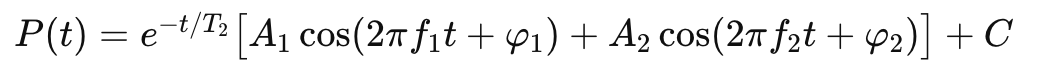

In [ ]:
# ==================================================================
# Fit Ramsey beating to two decaying cosines  (requires SciPy ≥1.6)
# ==================================================================
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfftfreq, rfft

# --- model --------------------------------------------------------
def double_cos(t_s, A, f1, f2, phi1, phi2, T2, C):
    env = A * np.exp(-t_s / T2)
    return env * (np.cos(2*np.pi*f1*t_s + phi1) +
                  np.cos(2*np.pi*f2*t_s + phi2)) + C

def single_cos(t_s, A, f1, f2, phi1, phi2, T2, C):
    env = A * np.exp(-t_s / T2)
    return env * np.cos(2*np.pi*f1*t_s + phi1) + C

# --- helper: crude initial guesses from FFT ----------------------
def guess_params(t_ns, y):
    t_s = t_ns*1e-9
    C0  = y.mean()
    A0  = 0.5*(y.max()-y.min())
    fs  = rfftfreq(len(t_s), t_s[1]-t_s[0])
    spec= np.abs(rfft(y-C0))
    peak_idx = spec.argsort()[-2:][::-1]   # two largest peaks
    f1, f2 = fs[peak_idx]
    return [A0, f1, f2, 0, 0, 20e-6, C0] # 5e-6
    #return [A0, f1, f2, 3, 3, 100e-6, C0] # 5e-6

# --- report -------------------------------------------------------
def report(label, p):
    print(f"{label}:  f1 = {p[1]/1e6:.3f} MHz   f2 = {p[2]/1e6:.3f} MHz   "
          f"T2 = {p[4]*1e6:.1f} µs")
    
def report_2a(label, p):
    print(f"{label}:  f1 = {p[2]/1e6:.3f} MHz   "
          f"f2 = {p[3]/1e6:.3f} MHz   "
          f"A1 = {p[0]:.2f}  A2 = {p[1]:.2f}   "
          f"T2 = {p[6]*1e6:.1f} µs", f"{p[4]} {p[5]}")
    
expA_t2 = []
expB_t2 = []
expA_p = []
expB_p = []
expA_c = []
expB_c = []
expA_o = []
expB_o = []

count = -1

use_double = True

for expA, expB in zip(expA_list, expB_list):
    count += 1

    t_s = t_ns*1e-9

    # --- fit both qubits ---------------------------------------------


    if use_double:
        use_2amp = True
        if use_2amp:

            bounds = ([0,0,     0,     0, -np.pi, -np.pi,      0, 0],       # lower
                      [1,1,  20e6,  20e6,  np.pi,  np.pi,   4e-4, 1])       # upper A1=0.5
            #bounds = ([0,0,     0,     0,  0, 0,      0, 0],       # lower
            #          [1,1,  20e6,  20e6,  2*np.pi,  2*np.pi,   4e-4, 1])       # upper A1=0.5            
            p0A = guess_params_2a(t_ns, expA)
            p0B = guess_params_2a(t_ns, expB)
            #p0A[3] = 1.01 * p0A[3]
            #p0B[3] = 1.01 * p0B[3]
            #p0A[1] = 0.0 # .01 * p0A[1]
            #p0B[1] = 0.0 # .01 * p0B[1]
            #p0A[0] = 0.5 # .01 * p0A[1]
            #p0B[0] = 0.5 # .01 * p0B[1]
            #p0A[4] = 0.1 # .01 * p0A[1]
            #p0B[4] = 0.1 # .01 * p0B[1]
            #p0A[2] =  3.0e6
            #print(p0B[2])
            
            pA,cA,oA,mesgA,_ = curve_fit(two_amp_cos, t_s, expA, p0=p0A, bounds=bounds, maxfev=50000, full_output=True)
            pB,cB,oB,mesgB,_ = curve_fit(two_amp_cos, t_s, expB, p0=p0B, bounds=bounds, maxfev=50000, full_output=True)

            pA,cA,oA,mesgA,_ = curve_fit(two_amp_cos, t_s, expA, p0=pA, bounds=bounds, maxfev=50000, full_output=True)
            pB,cB,oB,mesgB,_ = curve_fit(two_amp_cos, t_s, expB, p0=pB, bounds=bounds, maxfev=50000, full_output=True)

            report_2a("Qubit-A", pA)
            print(mesgA)
            report_2a("Qubit-B", pB)
            print(mesgB)

            expA_t2.append(pA[6])
            expB_t2.append(pB[6])
       
        else:
            p0A = guess_params(t_ns, expA)
            p0B = guess_params(t_ns, expB)
            p0A.pop(3)
            p0B.pop(3)
            print(p0A)
            bounds = ([0,   0,   0,-np.pi, 0.1e-4   ,0],
                      [1,20e6,20e6, np.pi, 3e-4,1])
            pA,cA,oA,mesgA,_ = curve_fit(cos_product, t_s,  expA, p0=[0.5,1e6,1e6, 0.1, 100e-6,0.5], bounds=bounds, maxfev=30000, full_output=True)
            pB,cB,oB,mesgB,_ = curve_fit(cos_product, t_s,  expB, p0=[0.5,1e6,1e6, 0.1, 100e-6,0.5], bounds=bounds, maxfev=30000, full_output=True)

            #if(count==2):
            #    print(p0A)
            ##bounds = ([0,0,0,-np.pi,-np.pi,0,0],
            ##          [1,20e6,20e6,np.pi,np.pi,1e-3,1])
            #bounds = ([0,0,0,0,0,0,0],
            #          [1,20e6,20e6,np.pi,np.pi,3e-4,1])
            ##pA,cA = curve_fit(double_cos, t_s, expA, p0=p0A, maxfev=30000)
            ##pB,cB = curve_fit(double_cos, t_s, expB, p0=p0B, maxfev=30000)
            #pA,cA,oA,mesgA,_ = curve_fit(double_cos, t_s, expA, p0=p0A, bounds=bounds, maxfev=30000, full_output=True)
            #pB,cB,oB,mesgB,_ = curve_fit(double_cos, t_s, expB, p0=p0B, bounds=bounds, maxfev=30000, full_output=True)
            
            report("Qubit-A", pA)
            print(mesgA)

            report("Qubit-B", pB)
            print(mesgB)
            
            expA_t2.append(pA[4])
            expB_t2.append(pB[4])

        expA_p.append(pA)
        expB_p.append(pB)

        expA_c.append(cA)
        expB_c.append(cB)

        expA_o.append(oA)
        expB_o.append(oB)

        #if pB[6] > 200e-6 :
        #    print(count)
    else:
        bounds = ([0,0,0,-np.pi,-np.pi,0,0],
                 [1,20e6,20e6,np.pi,np.pi,1e-3,1])
        
        p0A = guess_params(t_ns, expA)
        p0B = guess_params(t_ns, expB)
        #pA,cA = curve_fit(single_cos, t_s, expA, p0=p0A,  bounds=bounds, maxfev=30000)
        #pB,cB = curve_fit(single_cos, t_s, expB, p0=p0B,  bounds=bounds, maxfev=30000)
        pA,cA,oA,mesgA,_ = curve_fit(single_cos, t_s, expA, p0=p0A,   maxfev=30000, full_output=True)
        pB,cB,oA,mesgB,_ = curve_fit(single_cos, t_s, expB, p0=p0B,   maxfev=30000, full_output=True)

        report("Qubit-A", pA)
        print(mesgA)
        report("Qubit-B", pB)
        print(mesgB)

        expA_t2.append(pA[5])
        expB_t2.append(pB[5])
    
        expA_p.append(pA)
        expB_p.append(pB)

        expA_c.append(cA)
        expB_c.append(cB)
        
        expA_o.append(oA)
        expB_o.append(oB)


In [ ]:
i=3
expA = expA_list[i]
expB = expB_list[i]
pA = expA_p[i]
pB = expB_p[i]

# --- plots ------------------------------------------------
tf_ns = np.linspace(t_ns[0], t_ns[-1], 1200)
fig, ax = plt.subplots(1,2, figsize=(10,4))
if (use_double and use_2amp):
    for k,(y,p,title) in enumerate(zip((expA,expB),(pA,pB),("Qubit A","Qubit B"))):
        ax[k].plot(t_ns*1e-3, y, '.', label='data')
        (ax[k].plot(tf_ns*1e-3,
                    (two_amp_cos if use_double else single_cos)(tf_ns*1e-9, *p),
                    label='fit'))
        ax[k].set_title(title +
            (f"\n f₁={p[2]/1e6:.3f} MHz  f₂={p[3]/1e6:.3f} MHz\n"
             f"A₁={p[0]:.2f}  A₂={p[1]:.2f}  T₂={p[6]*1e6:.1f} µs"))
        ax[k].set_xlabel('Ramsey duration $\\tau$ (µs)'); ax[k].set_ylabel('P(e)')
        ax[k].legend()
    plt.tight_layout(); plt.show()
else :
    for k,(y,p,title) in enumerate(zip((expA,expB),(pA,pB),("Qubit A","Qubit B"))):
        ax[k].plot(t_ns*1e-3, y, '.', label='data')
        (ax[k].plot(tf_ns*1e-3,
                    (cos_product if use_double else single_cos)(tf_ns*1e-9, *p),
                    label='fit'))
        #ax[k].plot(tf_ns,
        #           single_cos(tf_ns*1e-9, *p), label='fit')
        ax[k].set_title(title+
            f"\n f1={p[1]/1e6:.3f} MHz  f2={p[2]/1e6:.3f} MHz  T2={p[5]*1e6:.1f} µs")
        ax[k].set_xlabel('Ramsey duration $\\tau$ (µs)'); ax[k].set_ylabel('P(e)')
        ax[k].legend()
    plt.tight_layout(); plt.show()

In [ ]:
r2_A_list = []
r2_B_list = []
errt2_A_list = []
errt2_B_list = []

for i in range(len(expA_list)):
    expA = expA_list[i]
    expB = expB_list[i]
    pA = expA_p[i]
    pB = expB_p[i]
    cA = expA_c[i]
    cB = expB_c[i]

    # Use t_ns length matching expA/expB
    t_ns = np.linspace(0, time, len(expA))
    t_s = t_ns * 1e-9

    # Choose model
    if use_double:
        ipar = 6
        yA_fit = two_amp_cos(t_s, *pA)
        yB_fit = two_amp_cos(t_s, *pB)
    else:
        ipar = 5
        yA_fit = single_cos(t_s, *pA)
        yB_fit = single_cos(t_s, *pB)

    # R squared
    def r_squared(y, y_fit):
        ss_res = np.sum((y - y_fit) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - ss_res / ss_tot

    r2_A_list.append(r_squared(expA, yA_fit))
    r2_B_list.append(r_squared(expB, yB_fit))

    # Error in T2 parameter (sqrt of covariance matrix diagonal)
    errt2_A_list.append(np.sqrt(np.diag(cA)[ipar]) if len(np.diag(cA)) > ipar else np.nan)
    errt2_B_list.append(np.sqrt(np.diag(cB)[ipar]) if len(np.diag(cB)) > ipar else np.nan)

# Histogram of R^2 for Qubit A and Qubit B
plt.figure(figsize=(8, 4))
plt.hist(r2_A_list, bins=20, alpha=0.7, label='Qubit A $R^2$', color='royalblue', edgecolor='black')
plt.hist(r2_B_list, bins=20, alpha=0.7, label='Qubit B $R^2$', color='tomato', edgecolor='black')
plt.xlabel('$R^2$')
plt.ylabel('Count')
plt.title('Histogram of $R^2$ for All Fits')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram of T2* fit error (errt2)
plt.figure(figsize=(8, 4))
plt.hist([x for x in errt2_A_list if not np.isnan(x)], bins=20, alpha=0.8, color='royalblue', edgecolor='black', label='Qubit A err(T2*)')
plt.hist([x for x in errt2_B_list if not np.isnan(x)], bins=20, alpha=0.8, color='tomato', edgecolor='black', label='Qubit B err(T2*)')
plt.xlabel('Fit error of T2* (s)')
plt.ylabel('Count')
plt.title('Histogram of T2* Fit Error')
plt.legend()

# Sample Telegraphic Noise 

In [ ]:
# Q A
plt.figure(figsize=(8, 5))
plt.hist(np.array(expA_t2)*1e6, bins=200, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("T2* ($\mu$s)")
plt.ylabel("Counts (arb. u.)")
plt.title("T2*: Qubit A ")
plt.grid(True)
plt.show()

In [ ]:
# Q B
plt.figure(figsize=(8, 5))
plt.hist(np.array(expB_t2)*1e6, bins=200, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("T2* ($\mu$s)")
plt.ylabel("Counts (arb. u.)")
plt.title("T2*: Qubit B")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist2d(expA_t2, expB_t2, bins=50, cmap='viridis')
plt.xlabel("Q_A T2 (us)")
plt.ylabel("Q_B T2 (us)")
plt.title("Correlated 2D Normal Distribution")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

# Time plot

In [ ]:
br_pt = int(len(expA_t2)/2)

loA = expA_t2[:br_pt]
hiA = expA_t2[br_pt:]

loB = expB_t2[:br_pt]
hiB = expB_t2[br_pt:]

res, tline = select_periodicCorr(hiA,loA,hiB,loB,2,100,12)
resA = np.array([float(x[0]) for x in res])
resB = np.array([float(x[1]) for x in res])


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(tline, resA*1e6, 'o', alpha=0.7, label='Qubit A')
plt.plot(tline, resB*1e6, 'o', alpha=0.7, label='Qubit B')
plt.xlabel("Time (hr)")
plt.ylabel("T2* ($\mu$s)")
plt.title("")
plt.legend()
plt.ylim(0, 300)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# calculate 
from scipy.stats import kurtosis, skew

def bimodality_coefficient(data):
    n = len(data)
    s = skew(data)
    k = kurtosis(data, fisher=False)
    return (s**2 + 1) / k

expA_t2 = np.array(expA_t2)
expB_t2 = np.array(expB_t2)

std_A = np.std(expA_t2*1e6)
std_B = np.std(expB_t2*1e6)
bc_A = bimodality_coefficient(expA_t2)
bc_B = bimodality_coefficient(expB_t2)

print(f"Qubit A: std = {std_A:.4f}, Bimodality Coefficient = {bc_A:.4f}")
print(f"Qubit B: std = {std_B:.4f}, Bimodality Coefficient = {bc_B:.4f}")
print(f"[{std_A:.4f},{bc_A:.4f}],")
print(f"[{std_B:.4f},{bc_B:.4f}],")

In [ ]:
a = [[4.2300,0.4784],
]

b =[[5.7547,0.4754],
]


In [ ]:
i=1
expA = expA_list[i]
expB = expB_list[i]

In [ ]:
def spectral_power_density(x, dt):
    freqs = np.fft.rfftfreq(len(x), dt)
    fft_vals = np.fft.rfft(x)
    spd = np.abs(fft_vals)**2 / len(x)
    return freqs, spd

dt = 1e-9  # Set your sample spacing (e.g., 1 unit between points, adjust as needed)
freqs_A, spd_A = spectral_power_density(expA*1e6, dt)
freqs_B, spd_B = spectral_power_density(expB*1e6, dt)

plt.figure(figsize=(10, 4))
plt.plot(freqs_A, spd_A, label='Qubit A SPD')
plt.plot(freqs_B, spd_B, label='Qubit B SPD')
plt.xlabel('Frequency')
plt.ylabel('Spectral Power Density')
plt.title('Spectral Power Density of T2*')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
expA = expA_s
expB = expB_s
t_ns = t_ns_s
# ==================================================================
# Fit Ramsey beating with *independent* amplitudes for each branch
# Assumes t_ns, expA, expB are defined (from the simulation cell)
# ==================================================================
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfftfreq, rfft

# ---------- model -------------------------------------------------
def two_amp_cos(t_s, A1, A2, f1, f2, phi1, phi2, T2, C):
    env = np.exp(-t_s / T2)
    return env * (A1*np.cos(2*np.pi*f1*t_s + phi1) +
                  A2*np.cos(2*np.pi*f2*t_s + phi2)) + C

# ---------- initial-guess helper (FFT) ---------------------------
def guess_params(t_ns, y):
    t_s = t_ns * 1e-9
    C0  = y.mean()
    
    y0  = y - C0
    A_guess = 0.5*(y.max()-y.min())
    fs   = rfftfreq(len(t_s), t_s[1]-t_s[0])
    spec = np.abs(rfft(y0))
    idx  = spec.argsort()[-2:][::-1]          # two largest peaks
    f1, f2 = fs[idx]
    return [A_guess, A_guess, f1, f2, 0.0, 0.0, 5e-6, C0]

# ---------- fit both qubits --------------------------------------
t_s = t_ns * 1e-9
p0A = guess_params(t_ns, expA)
p0B = guess_params(t_ns, expB)

bounds = ([0,0,      0,      0, -np.pi, -np.pi,        0, 0],   # lower
          [1,1,  20e6,  20e6,  np.pi,  np.pi,   1e-3, 1])       # upper

pA, _ = curve_fit(two_amp_cos, t_s, expA, p0=p0A,
                  bounds=bounds, maxfev=50000)
pB, _ = curve_fit(two_amp_cos, t_s, expB, p0=p0B,
                  bounds=bounds, maxfev=50000)

# ---------- report ----------------------------------------------
def report(label, p):
    print(f"{label}:  f1 = {p[2]/1e6:.3f} MHz   "
          f"f2 = {p[3]/1e6:.3f} MHz   "
          f"A1 = {p[0]:.2f}  A2 = {p[1]:.2f}   "
          f"T2 = {p[6]*1e6:.1f} µs")

report("Qubit-A", pA)
report("Qubit-B", pB)

# ---------- plots ---------------------------------------
tf_ns = np.linspace(t_ns[0], t_ns[-1], 1600)
fig, ax = plt.subplots(1,2, figsize=(10,4))
for k, (y, p, title) in enumerate(zip((expA, expB),
                                      (pA, pB),
                                      ("Qubit A", "Qubit B"))):
    ax[k].plot(t_ns, y, '.', ms=3, label='data')
    ax[k].plot(tf_ns,
               two_amp_cos(tf_ns*1e-9, *p), lw=1.4, label='fit')
    ax[k].set_title(title +
      (f"\n f₁={p[2]/1e6:.3f} MHz  f₂={p[3]/1e6:.3f} MHz\n"
       f"A₁={p[0]:.2f}  A₂={p[1]:.2f}  T₂={p[6]*1e6:.1f} µs"))
    ax[k].set_xlabel('delay (ns)'); ax[k].set_ylabel('P(e)')
    ax[k].legend()
plt.tight_layout(); plt.show()


In [ ]:
v = [10,20,30,40,50]
v.pop(2)
print(v)